Variable Definitions

In [71]:
# Define the columns to retain for each file
# In this variable I have defined for each file the columns I am interested in. This allows me when integrating the file to have a reference structure. By dynamically allowing a selection of data.
columns_to_retain = {
    'Cloud_Warehouse_Compersion_Chart': ['Shiprocket', 'INCREFF'],
    'Sale_Report': ['SKU Code', 'Design No.', 'Stock', 'Category', 'Size', 'Color'],
    'P__L_March_2021': ['Category', 'Sku', 'Catalog', 'Weight', 'TP 1', 'TP 2', 'MRP Old', 'Final MRP Old', 'Ajio MRP', 'Amazon MRP', 'Amazon FBA MRP', 'Flipkart MRP', 'Limeroad MRP', 'Myntra MRP', 'Paytm MRP', 'Snapdeal MRP'],
    'May-2022': ['Sku', 'Catalog', 'Category', 'Weight', 'MRP Old', 'Final MRP Old', 'Ajio MRP', 'Amazon MRP', 'Amazon FBA MRP', 'Flipkart MRP', 'Limeroad MRP', 'Myntra MRP', 'Paytm MRP', 'Snapdeal MRP', 'TP 1 & TP 2 MRP Old'],
    'Amazon_Sale_Report': ['Category', 'Size', 'Sales Channel','Date', 'Status', 'Fulfilment', 'Style', 'SKU', 'ASIN', 'Courier Status', 'Qty', 'Amount', 'B2B', 'Currency', 'Ship-city', 'Ship-state'],
    'International_sale_Report': ['Style', 'SKU', 'Size', 'DATE', 'Months', 'CUSTOMER', 'PCS', 'RATE', 'GROSS AMT'],
    'Expense_IIGF': ['Recived Amount']
}

# Here I preferred to define for each file the data type of each column. This is because on analysing the file, I found many inconsistencies with the description given in kaggle. 
# Analysing each column by extrapolating the most commonly used data type, then grouping the data by type, I found that the data type suggested for the data provided was not consistent with that provided in the dataset description. 
# Therefore, I preferred to define the data structure I expect and cast the data type of the column if it does not match what I expect. Avoiding possibilities where the passed dataset does not provide the data accurately.
column_data_types = {
    # File: Cloud Warehouse Compersion Chart.csv
    'Shiprocket': 'int64',
    'INCREFF': 'int64',

    # File: Sale Report.csv
    'SKU Code': 'str',
    'Design No.': 'str',
    'Stock': 'int64',
    'Category': 'str',
    'Size': 'str',
    'Color': 'str',

    # File: P & L March 2021.csv
    'Category': 'str',
    'Sku': 'str',
    'Catalog': 'str',
    'Weight': 'int64',
    'TP 1': 'int64',
    'TP 2': 'int64',
    'MRP Old': 'int64',
    'Final MRP Old': 'int64',
    'Ajio MRP': 'int64',
    'Amazon MRP': 'int64',
    'Amazon FBA MRP': 'int64',
    'Flipkart MRP': 'int64',
    'Limeroad MRP': 'int64',
    'Myntra MRP': 'int64',
    'Paytm MRP': 'int64',
    'Snapdeal MRP': 'int64',

    # File: May-2022.csv
    'Sku': 'str',
    'Catalog': 'str',
    'Category': 'str',
    'Weight': 'int64',
    'MRP Old': 'int64',
    'Final MRP Old': 'int64',
    'Ajio MRP': 'int64',
    'Amazon MRP': 'int64',
    'Amazon FBA MRP': 'int64',
    'Flipkart MRP': 'int64',
    'Limeroad MRP': 'int64',
    'Myntra MRP': 'int64',
    'Paytm MRP': 'int64',
    'Snapdeal MRP': 'int64',
    'TP 1 & TP 2 MRP Old': 'int64',

    # File: Amazon Sale Report.csv
    'Category': 'str',
    'Size': 'str',
    'Sales Channel': 'str',
    'Date': 'datetime64',
    'Status': 'str',
    'Fulfilment': 'str',
    'Style': 'str',
    'SKU': 'str',
    'ASIN': 'str',
    'Courier Status': 'str',
    'Qty': 'int64',
    'Amount': 'float',
    'B2B': 'bool',
    'Currency': 'str',
    'Ship-city': 'str',

    # File: International sale Report.csv
    'Style': 'str',
    'SKU': 'str',
    'Size': 'str',
    'DATE': 'datetime64',
    'Months': 'str',
    'CUSTOMER': 'str',
    'PCS': 'int64',
    'RATE': 'float',
    'GROSS AMT': 'float',

    # File: Expense IIGF.csv
    'Recived Amount': 'int64'
}

Part 1: Data Exploration and Cleaning 

1. Identifying anomalies or inconsistencies (e.g., missing values, incorrect data types, outliers).

2. Cleaning and standardising the data to ensure consistency across the various columns across the different files/sources, what you find.

Utility Function Definitions

In [72]:
# In this part of the code, I define some functions that I will use for the first part of the assigment

def process_files(df):
    """
    Processes the columns of a DataFrame by changing their data types based on a predefined dictionary.

    Args:
        df (pandas.DataFrame): The DataFrame to be processed.
    Returns:
        pandas.DataFrame: The DataFrame with updated column data types.
        
    The function checks each column in the DataFrame against a predefined dictionary `column_data_types`.
    Depending on the specified data type in the dictionary, it converts the column to the appropriate type:
        - 'int64': Converts the column to integer, coercing errors and downcasting to integer.
        - 'float': Converts the column to float, coercing errors and downcasting to float.
        - 'bool': Converts the column to boolean, ignoring errors.
        - 'datetime64': Converts the column to datetime, using the format "%m-%d-%y" and coercing errors.
    """

    # Check if the file name is present in the dictionary and if the columns exist
    for column in df.columns:
        if column in column_data_types:
            dtype = column_data_types[column]

            # Change column data type                
            if dtype == 'int64':
                df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')
            elif dtype == 'float':
                df[column] = pd.to_numeric(df[column], errors='coerce', downcast='float')
            elif dtype == 'bool':
                df[column] = df[column].astype('bool', errors='ignore')
            elif dtype == 'datetime64':
                df[column] = pd.to_datetime(df[column], format="%m-%d-%y",errors='coerce')        
    return df



END Utility Function Definitions

MAIN CODE

In [73]:
import os
import glob
import kagglehub
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:

#--- 1. -----> This part allows me to download the dataset, and save the files locally

# Download latest version
path = kagglehub.dataset_download("thedevastator/unlock-profits-with-e-commerce-sales-data")


# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

#--- 1. -----> END part data storage and access

Processing Amazon_Sale_Report...


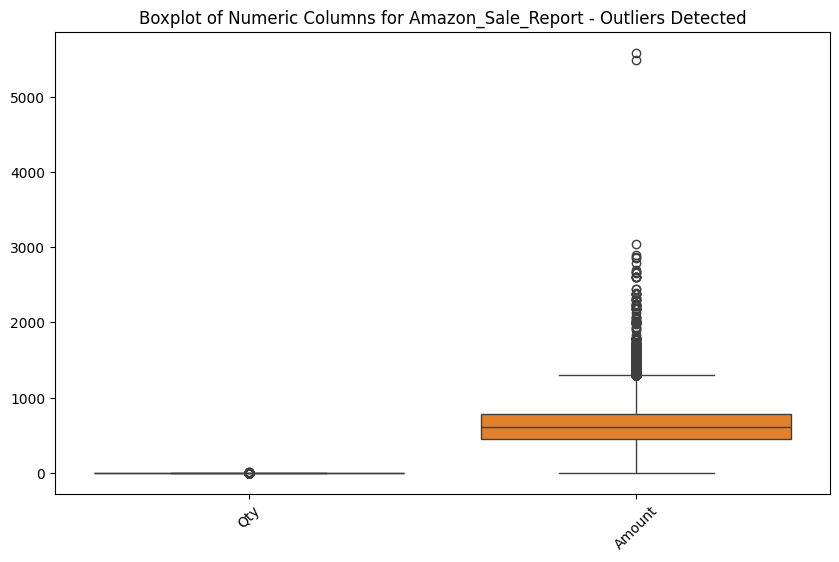

Missing values in Amazon_Sale_Report:
No missing values found.

             Date                        Status Fulfilment Sales Channel  \
1      2022-04-30  Shipped - Delivered to Buyer   Merchant     Amazon.in   
2      2022-04-30                       Shipped     Amazon     Amazon.in   
4      2022-04-30                       Shipped     Amazon     Amazon.in   
5      2022-04-30                       Shipped     Amazon     Amazon.in   
6      2022-04-30                       Shipped     Amazon     Amazon.in   
...           ...                           ...        ...           ...   
128970 2022-05-31                       Shipped     Amazon     Amazon.in   
128971 2022-05-31                       Shipped     Amazon     Amazon.in   
128972 2022-05-31                       Shipped     Amazon     Amazon.in   
128973 2022-05-31                       Shipped     Amazon     Amazon.in   
128974 2022-05-31                       Shipped     Amazon     Amazon.in   

          Style        

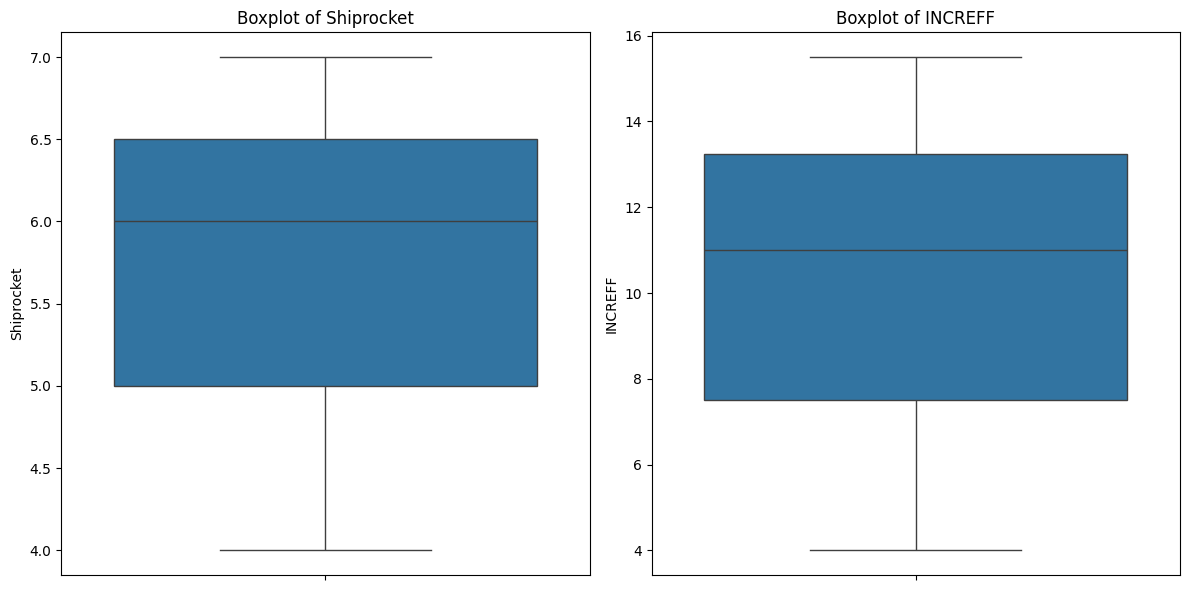

Missing values in Cloud_Warehouse_Compersion_Chart:
Shiprocket    29
Unnamed: 1     9
INCREFF       22
dtype: int64


   Shiprocket  INCREFF
1         4.0      4.0
2         7.0     11.0
4         6.0     15.5


Processing Expense_IIGF...


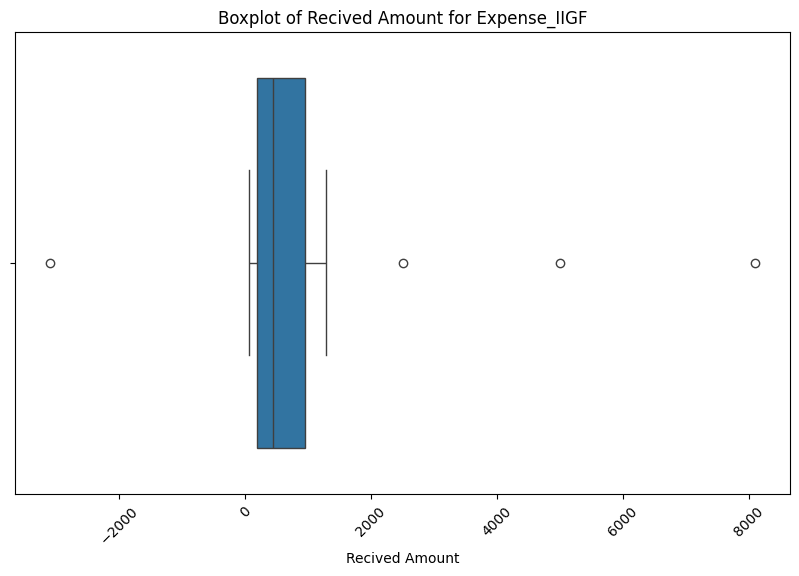

Missing values in Expense_IIGF:
Recived Amount    11
Unnamed: 1        11
Expance            2
dtype: int64


    Recived Amount
1            380.0
2            170.0
3            839.0
4            520.0
5            500.0
6           2506.0
7           1290.0
8            200.0
9            400.0
10           800.0
11           120.0
12            70.0
13           300.0
14          8095.0
15         -3095.0
16          5000.0


Processing International_sale_Report...


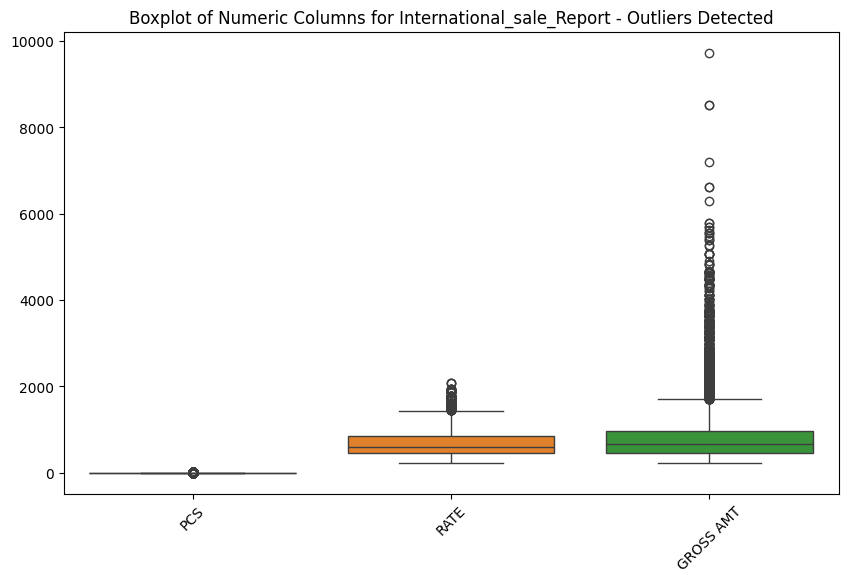

Missing values in International_sale_Report:
No missing values found.

            DATE  Months            CUSTOMER     Style              SKU Size  \
0     2021-06-05  Jun-21  REVATHY LOGANATHAN   MEN5004     MEN5004-KR-L    L   
1     2021-06-05  Jun-21  REVATHY LOGANATHAN   MEN5004    MEN5004-KR-XL   XL   
2     2021-06-05  Jun-21  REVATHY LOGANATHAN   MEN5004   MEN5004-KR-XXL  XXL   
3     2021-06-05  Jun-21  REVATHY LOGANATHAN   MEN5009     MEN5009-KR-L    L   
4     2021-06-05  Jun-21  REVATHY LOGANATHAN   MEN5011     MEN5011-KR-L    L   
...          ...     ...                 ...       ...              ...  ...   
17230 2022-03-31  Mar-22              AVIN      SET276   SET276-KR-PP-L    L   
17231 2022-03-31  Mar-22              AVIN    PJNE3423  PJNE3423-KR-4XL  4XL   
17232 2022-03-31  Mar-22              AVIN    PJNE3404  PJNE3404-KR-4XL  4XL   
17233 2022-03-31  Mar-22              AVIN    PJNE3423  PJNE3423-KR-4XL  4XL   
17234 2022-03-31  Mar-22              AVIN      S

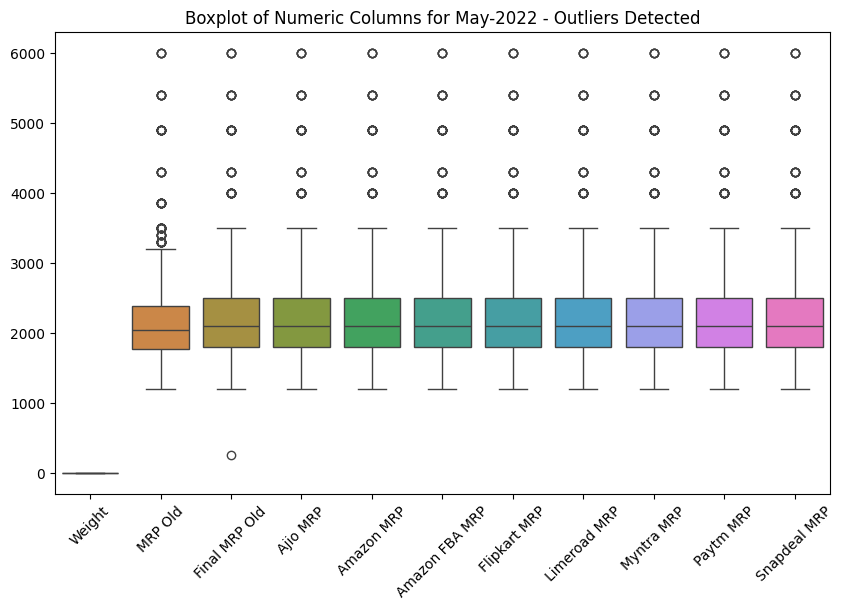

Missing values in May-2022:
No missing values found.

                 Sku  Catalog Category  Weight  MRP Old  Final MRP Old  \
0       Os206_3141_S  Moments    Kurta     0.3   2178.0         2295.0   
1       Os206_3141_M  Moments    Kurta     0.3   2178.0         2295.0   
2       Os206_3141_L  Moments    Kurta     0.3   2178.0         2295.0   
3      Os206_3141_XL  Moments    Kurta     0.3   2178.0         2295.0   
4     Os206_3141_2XL  Moments    Kurta     0.3   2178.0         2295.0   
...              ...      ...      ...     ...      ...            ...   
1325         Os326_M      Mix    Kurta     0.3   1878.0         1995.0   
1326         Os326_L      Mix    Kurta     0.3   1878.0         1995.0   
1327        Os326_XL      Mix    Kurta     0.3   1878.0         1995.0   
1328       Os326_2XL      Mix    Kurta     0.3   1878.0         1995.0   
1329       Os326_3XL      Mix    Kurta     0.3   1878.0         1995.0   

      Ajio MRP  Amazon MRP  Amazon FBA MRP  Flipkart MRP 

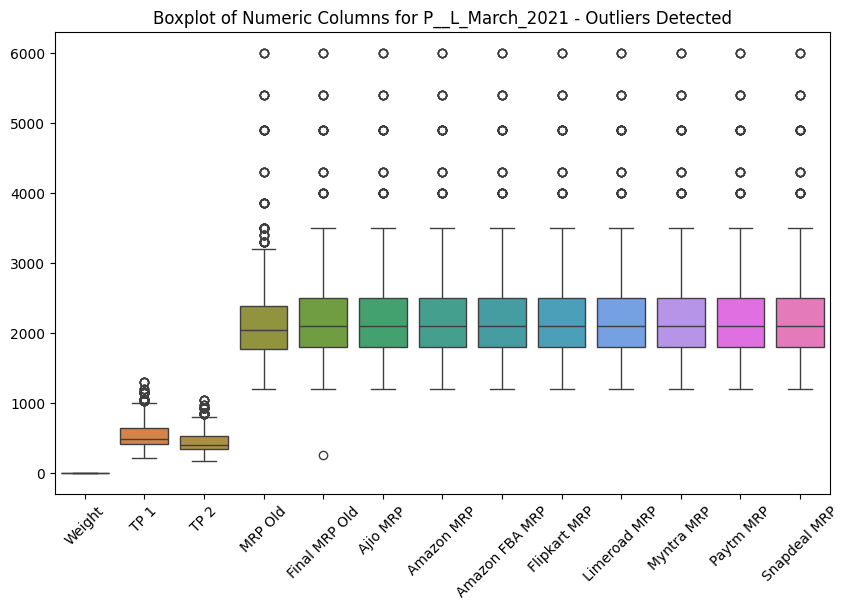

Missing values in P__L_March_2021:
No missing values found.

                 Sku  Catalog Category  Weight   TP 1    TP 2  MRP Old  \
0       Os206_3141_S  Moments    Kurta     0.3  538.0  435.78   2178.0   
1       Os206_3141_M  Moments    Kurta     0.3  538.0  435.78   2178.0   
2       Os206_3141_L  Moments    Kurta     0.3  538.0  435.78   2178.0   
3      Os206_3141_XL  Moments    Kurta     0.3  538.0  435.78   2178.0   
4     Os206_3141_2XL  Moments    Kurta     0.3  538.0  435.78   2178.0   
...              ...      ...      ...     ...    ...     ...      ...   
1325         Os326_M      Mix    Kurta     0.3  467.0  378.27   1878.0   
1326         Os326_L      Mix    Kurta     0.3  467.0  378.27   1878.0   
1327        Os326_XL      Mix    Kurta     0.3  467.0  378.27   1878.0   
1328       Os326_2XL      Mix    Kurta     0.3  467.0  378.27   1878.0   
1329       Os326_3XL      Mix    Kurta     0.3  467.0  378.27   1878.0   

      Final MRP Old  Ajio MRP  Amazon MRP  Amazon 

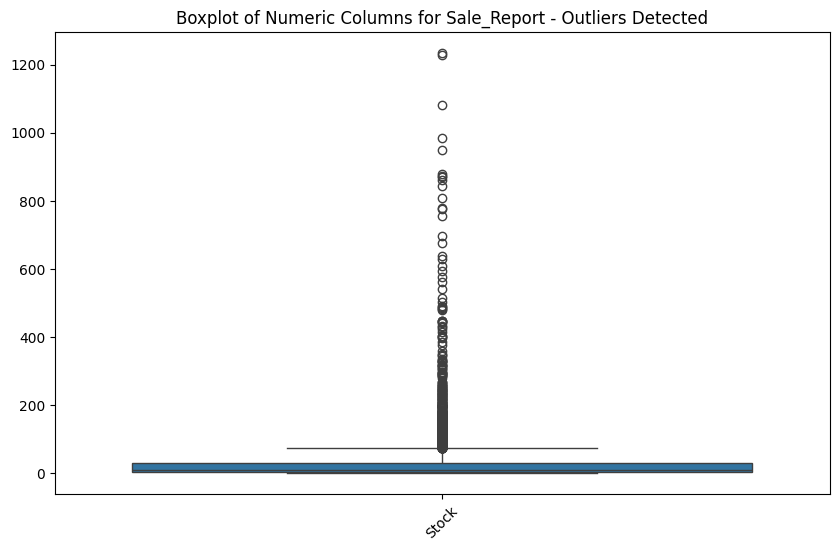

Missing values in Sale_Report:
No missing values found.

               SKU Code Design No.  Stock       Category  Size Color
0           AN201-RED-L      AN201    5.0  AN : LEGGINGS     L   Red
1           AN201-RED-M      AN201    5.0  AN : LEGGINGS     M   Red
2           AN201-RED-S      AN201    3.0  AN : LEGGINGS     S   Red
3          AN201-RED-XL      AN201    6.0  AN : LEGGINGS    XL   Red
4         AN201-RED-XXL      AN201    3.0  AN : LEGGINGS   XXL   Red
...                 ...        ...    ...            ...   ...   ...
9230     SET462-KR-NP-S     SET462   44.0            SET     S  Teal
9231    SET462-KR-NP-XL     SET462   58.0            SET    XL  Teal
9232    SET462-KR-NP-XS     SET462   20.0            SET    XS  Teal
9233   SET462-KR-NP-XXL     SET462   66.0            SET   XXL  Teal
9234  SET462-KR-NP-XXXL     SET462   40.0            SET  XXXL  Teal

[9188 rows x 6 columns]




In [75]:

#--- 2. -----> Main part where I analyse each file (Part 1: Data Exploration and Cleaning)

# Initialize a dictionary to store cleaned dataframes
cleaned_dataframes = {}
# Iterate through the list of CSV files
for file in csv_files:
    
    # Extract the dataframe name from the filename, replacing spaces with underscores
    df_name = os.path.splitext(os.path.basename(file))[0].replace(" ", "_")
    print(f"Processing {df_name}...")
            
    # Load the full CSV file into a DataFrame
    df = pd.read_csv(file, low_memory=False)  
    
    # Initialize a list to track numeric columns for outlier detection
    outlier_columns = []
    # Special handling for the "Cloud_Warehouse_Compersion_Chart" DataFrame
    # Because this file was created differently from the other files. So in this case, not having the possibility to collaborate and define a structure, this file was treated manually.
    # In other cases, it would be appropriate to define whether this file is useful with respect to the analysis to be undertaken and whether there is a possibility of optimally defining the extraction of this file. 
    if df_name == 'Cloud_Warehouse_Compersion_Chart':
        
        # Select only the columns "Shiprocket" and "INCREFF", as they contain the most useful information and correspond to the architecture defined in the file description on kaggle
        # Since the csv file is not formatted correctly, the values are entered in the Unnamed: 1 column, so I extract the column and transform it with the correct name.
        df_selected = df[['Unnamed: 1', 'INCREFF']].copy()
        # Rename the column to 'Shiprocket' in which the data is stored in the file
        df_selected.rename(columns={'Unnamed: 1': 'Shiprocket'}, inplace=True)

        # Remove any non-numeric characters (except for the decimal point) and convert to numeric
        df_selected['Shiprocket'] = df_selected['Shiprocket'].str.replace(r'[^\d.]', '', regex=True)

        # Convert the "INCREFF" and "Shiprocket" columns to numeric, coercing non-numeric values to NaN
        df_selected['Shiprocket'] = pd.to_numeric(df_selected['Shiprocket'], errors='coerce')
        df_selected['INCREFF'] = pd.to_numeric(df_selected['INCREFF'], errors='coerce')                
                               
        # Remove rows where "INCREFF" or "Shiprocket" is NaN
        df_selected = df_selected.dropna(subset=['INCREFF', 'Shiprocket'])       
        
        # Create boxplots for each variable
        plt.figure(figsize=(12, 6))

        # Create a subplot for Shiprocket
        plt.subplot(1, 2, 1)
        sns.boxplot(y='Shiprocket', data=df_selected)
        plt.title("Boxplot of Shiprocket")

        # Create a subplot for INCREFF
        plt.subplot(1, 2, 2)
        sns.boxplot(y='INCREFF', data=df_selected)
        plt.title("Boxplot of INCREFF")

        plt.tight_layout()
        plt.show()  

        # Add the cleaned DataFrame to the dictionary
        cleaned_dataframes[df_name] = df_selected

    # Special handling for the "Expense_IIGF" DataFrame
    # It was done on the basis of the same reasons given for the previous file (Cloud_Warehouse_Compersion_Chart)
    elif df_name == 'Expense_IIGF':

        # Select the column 'Unnamed: 3' and create a copy, to not work directly on the dataframe
        df_selected = df[['Unnamed: 3']].copy()

        # Rename the column to 'Received Amount' in which the data is stored in the file
        df_selected.rename(columns={'Unnamed: 3': 'Recived Amount'}, inplace=True)

        # Convert the 'Recived Amount' column to numeric values, coercing errors to NaN
        df_selected['Recived Amount'] = pd.to_numeric(df_selected['Recived Amount'], errors='coerce')

        # Drop rows with NaN values in 'Recived Amount'
        df_selected = df_selected.dropna(subset=['Recived Amount'])
            
        # Visualize outliers in the combined column with a boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Recived Amount', data=df_selected)
        plt.title(f"Boxplot of Recived Amount for {df_name}")
        plt.xticks(rotation=45)
        plt.show()

        # Add the cleaned DataFrame to the dictionary
        cleaned_dataframes[df_name] = df_selected
    else:
        # Process and clean the DataFrame
        df = process_files(df)

        if df_name in columns_to_retain:
            # Retrieve and standardize columns to retain
            # The approach of converting column names to lower case was used as some columns in the file have their names spelled differently. 
            # The names were then merged into lower case in the operation phase and then merged in the final phase.  
            retain_columns = columns_to_retain[df_name]
            retain_columns_lower = [col.strip().lower() for col in retain_columns]
            
            # Standardize column names in the DataFrame early
            df.columns = [col.strip().lower() for col in df.columns]
            
            # Filter and retain only specified columns
            filtered_columns = [col for col in df.columns if col in retain_columns_lower]
            df = df[filtered_columns]
            
            # Drop rows with missing values in the filtered columns
            df = df.dropna(subset=filtered_columns)

            
            # Rename columns to match specified casing 
            column_rename_map = {rc.lower(): rc for rc in retain_columns}
            df.rename(columns=column_rename_map, inplace=True)
            

        # Identify numeric columns for outlier detection
        outlier_columns = df.select_dtypes(include=['int64', 'int8', 'float32', 'float64']).columns.tolist()

        # Add the cleaned DataFrame to the dictionary
        cleaned_dataframes[df_name] = df

        # If numeric columns are present, visualize their outliers with a boxplot
        if outlier_columns:
            df_outliers = df[outlier_columns]
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=df_outliers)
            plt.title(f"Boxplot of Numeric Columns for {df_name} - Outliers Detected")
            plt.xticks(rotation=45)
            plt.show()

    # Display missing values for the current DataFrame
    missing_values = df.isna().sum()
    print(f"Missing values in {df_name}:")
    if missing_values.sum() == 0:
        print("No missing values found.\n")
    else:
        print(missing_values[missing_values > 0])
        print("\n")

    # Print the cleaned DataFrame for debugging or review
    print(cleaned_dataframes[df_name])
    print("\n")
    #--- 2. -----> END Part 1: Data Exploration and Cleaning)

    

END PART 1

Utility Function Definitions

In [76]:
def run_query(query):
    """
    Executes a SQL query and returns the result as a pandas DataFrame.

    Parameters:
    query (str): The SQL query to be executed.

    Returns:
    pandas.DataFrame: The result of the SQL query.
    """
    return pd.read_sql_query(query, conn)

def exec_query(query):
    """
    Executes a SQL query on the connected database.

    Parameters:
    query (str): The SQL query to be executed. It can be a SELECT query or any other SQL command.

    Returns:
    pd.DataFrame or None: If the query is a SELECT query, it returns a pandas DataFrame containing the result set.
                          For non-SELECT queries (like DROP, INSERT, UPDATE, etc.), it returns None.
    """
    # Check if the query is a SELECT query
    if query.strip().upper().startswith('SELECT'):
        return pd.read_sql_query(query, conn)
    else:
        # Execute non-SELECT queries (like DROP, INSERT, UPDATE, etc.)
        conn.execute(query)
        conn.commit()  
        return None  

In [77]:
# Define the SQLite database file name
# I used sqlite to create a database to insert the created and cleaned dataframes and then run the necessary queries for the next steps
db_name = 'deipresse.db'
# Establish a connection to the SQLite database
conn = sqlite3.connect(db_name)

# Use a context manager to ensure the connection is properly closed after operations
with sqlite3.connect(db_name, timeout=10) as conn:
    # Iterate over the cleaned DataFrames stored in the dictionary
    for df_name, df in cleaned_dataframes.items():
        print(f"Loading {df_name} into SQLite...")
        
        # Modify column names to replace spaces with underscores for SQLite compatibility
        df.columns = [col.replace(" ", "_") for col in df.columns]
        
        # Load the DataFrame into the SQLite database as a table
        # The table name is derived from the DataFrame name (df_name)
        # `if_exists='replace'` ensures the table is overwritten if it already exists
        # `index=False` excludes the DataFrame index from being written as a table column
        df.to_sql(df_name, conn, if_exists='replace', index=False)

Loading Amazon_Sale_Report into SQLite...
Loading Cloud_Warehouse_Compersion_Chart into SQLite...
Loading Expense_IIGF into SQLite...
Loading International_sale_Report into SQLite...
Loading May-2022 into SQLite...
Loading P__L_March_2021 into SQLite...
Loading Sale_Report into SQLite...


Part 2: Data Transformation and Currency Conversion

TASK: Convert All Monetary Values to USD

1. Convert all monetary values to a single currency (assume USD as the standard currency). Create a reusable currency exchange table
to dynamically perform conversions, ensuring flexibility to update exchange rates as required.

In [15]:
"""
This script creates a table named 'Currency_Exchange' with two columns:
- Currency: A VARCHAR(10) that serves as the primary key.
- Exchange_Rate_USD: A FLOAT that stores the exchange rate of the currency to USD.
"""

query = """
CREATE TABLE Currency_Exchange (
    Currency VARCHAR(10) PRIMARY KEY,
    Exchange_Rate_USD FLOAT
);
"""
# Execute the query
result = exec_query(query)
print(result)

None


In [14]:
"""
Used for testing purposes, this script drops the 'Currency_Exchange' table if it already exists in the database.
"""
query = """
DROP TABLE IF EXISTS Currency_Exchange;
"""
# Execute the query
result = exec_query(query)
print(result)

None


In [16]:
"""
This script inserts currency exchange rates into the Currency_Exchange table.

The query inserts the following currency exchange rates to USD:
- INR (Indian Rupee) with an exchange rate of 0.012
- EUR (Euro) with an exchange rate of 1.1
- GBP (British Pound) with an exchange rate of 1.3
- AUD (Australian Dollar) with an exchange rate of 0.64
"""

query = """
INSERT INTO Currency_Exchange (Currency, Exchange_Rate_USD)
VALUES
    ('INR', 0.012),   -- Indian Rupee to USD
    ('EUR', 1.1),     -- Euro to USD
    ('GBP', 1.3),     -- British Pound to USD
    ('AUD', 0.64);    -- Australian Dollar to USD
"""
# Execute the query
result = exec_query(query)
print(result)

None


END PART 2. Task: Convert All Monetary Values to USD

The following 3 queries are part of the following task: 

2. Combine Relevant Datasets: Merge datasets (e.g., sales reports and expenses) using common identifiers like SKU or Category to create a unified view of sales performance

In [78]:
"""
This query integrates data from Sale Report, Amazon Sale Report, and International Sale Report to provide a unified view of stock availability, Amazon sales, and international sales.
It enables analysis of product performance, stock utilization, sales volume, and revenue across multiple sales channels.
"""

query = """
SELECT
    sr.SKU_Code AS SKU,
    sr."Design_No." AS Design_No,
    sr.Stock,
    sr.Category AS Stock_Category,
    sr.Size AS Stock_Size,
    sr.Color AS Stock_Color,
    am.Category AS Amazon_Category,
    am.Size AS Amazon_Size,
    am.Date AS Amazon_Date,
    am.Status AS Sale_Status,
    am.Qty AS Amazon_Quantity,    
    'USD' AS Amazon_Currency,
    intl.DATE AS International_Date,
    intl.Months AS Sale_Month,
    intl.CUSTOMER AS Customer,
    intl.PCS AS International_Pieces,    
        
    (am.Amount * ce.Exchange_Rate_USD) AS Amazon_Amount_USD,
    (intl.GROSS_AMT * ce.Exchange_Rate_USD) AS International_Gross_Amount_USD,
    (intl.RATE * ce.Exchange_Rate_USD) AS Int_Rate_USD
    
FROM 
    Sale_Report sr
LEFT JOIN 
    Amazon_Sale_Report am
ON 
    sr.SKU_Code = am.SKU
INNER JOIN 
    International_sale_Report intl
ON 
    sr.SKU_Code = intl.SKU AND sr.Size = intl.Size
LEFT JOIN 
    Currency_Exchange ce
ON 
    ce.Currency = am.Currency
WHERE 
    am.Category IS NOT NULL ;
"""
# Execute the query
result = run_query(query)
print(result)

                    SKU Design_No  Stock Stock_Category Stock_Size  \
0         JNE3371-KR-XL   JNE3371    4.0          KURTA         XL   
1       JNE3671-TU-XXXL   JNE3671    6.0          TUNIC       XXXL   
2       JNE3671-TU-XXXL   JNE3671    6.0          TUNIC       XXXL   
3       SET264-KR-NP-XL    SET264   81.0      KURTA SET         XL   
4       SET264-KR-NP-XL    SET264   81.0      KURTA SET         XL   
...                 ...       ...    ...            ...        ...   
351937     J0012-SKD-XS     J0012   93.0      KURTA SET         XS   
351938     J0012-SKD-XS     J0012   93.0      KURTA SET         XS   
351939     J0012-SKD-XS     J0012   93.0      KURTA SET         XS   
351940      J0003-SET-S     J0003    9.0      KURTA SET          S   
351941      J0003-SET-S     J0003    9.0      KURTA SET          S   

        Stock_Color Amazon_Category Amazon_Size          Amazon_Date  \
0       Light Green           kurta          XL  2022-04-30 00:00:00   
1              

In [79]:
"""
This query combines local stock data (Sale_Report) with international sales data (International_sale_Report) 
using the SKU field. It allows for analyzing inventory, sales performance, market preferences, and seasonal trends 
by comparing available stock with sold items and evaluating the revenue generated.
"""

query = """
SELECT 
    sr.SKU_Code AS SKU,
    sr."Design_No." AS Design_No,
    sr.Stock,
    sr.Category,
    pl.Size,
    pl.PCS,    
    pl.Months,
    pl.DATE,
    pl.CUSTOMER,
    pl.Style,

    (pl.GROSS_AMT * ce.Exchange_Rate_USD) AS International_Gross_Amount_USD,
    (pl.RATE * ce.Exchange_Rate_USD) AS Int_Rate_USD
FROM 
    Sale_Report sr
INNER JOIN 
    International_sale_Report pl
ON 
    sr.SKU_Code = pl.Sku
INNER JOIN 
    Amazon_Sale_Report am
ON 
    sr.SKU_Code = am.SKU
LEFT JOIN 
    Currency_Exchange ce
ON 
    ce.Currency = am.Currency
"""
# Execute the query
result = run_query(query)
print(result)

                      SKU Design_No  Stock       Category  Size  PCS  Months  \
0          AN202-ORANGE-M     AN202    3.0  AN : LEGGINGS     M  1.0  Aug-21   
1          AN202-ORANGE-M     AN202    3.0  AN : LEGGINGS     M  1.0  Aug-21   
2          AN202-ORANGE-S     AN202   16.0  AN : LEGGINGS     S  1.0  Aug-21   
3          AN202-ORANGE-S     AN202   16.0  AN : LEGGINGS     S  1.0  Aug-21   
4          AN202-ORANGE-S     AN202   16.0  AN : LEGGINGS     S  1.0  Aug-21   
...                   ...       ...    ...            ...   ...  ...     ...   
351978  SET413-KR-NP-XXXL    SET413   13.0            SET  XXXL  1.0  Feb-22   
351979  SET413-KR-NP-XXXL    SET413   13.0            SET  XXXL  1.0  Feb-22   
351980  SET413-KR-NP-XXXL    SET413   13.0            SET  XXXL  1.0  Feb-22   
351981  SET413-KR-NP-XXXL    SET413   13.0            SET  XXXL  1.0  Feb-22   
351982  SET413-KR-NP-XXXL    SET413   13.0            SET  XXXL  1.0  Feb-22   

                       DATE            

In [80]:
"""
This query merges pricing data from two different time periods (May-2022 and P & L March 2021) based on the SKU and Category fields. It enables comparison of product pricing across multiple platforms 
and time periods, allowing analysis of pricing trends, platform-specific variations, and discount impacts.
As the dataset contains information in the other tables from Indian currency, as there is no information on which currency is used, the IND currency is also considered in these tables. 
"""

query = """
WITH Currency AS (
    SELECT Exchange_Rate_USD 
    FROM Currency_Exchange
    WHERE Currency = 'INR'
)

SELECT 
    my.Sku as SKU,
    my.Category as Category,
    my.Weight,
    my.MRP_Old,
    my.Final_MRP_Old,
    my.Ajio_MRP,
    my.Amazon_MRP,
    my.Amazon_FBA_MRP,
    my.Flipkart_MRP,
    my.Limeroad_MRP,
    my.Myntra_MRP,
    my.Paytm_MRP,
    my.Snapdeal_MRP,
    pl.Catalog,
    pl.TP_1,
    pl.TP_2, 

    (my.Ajio_MRP * ce.Exchange_Rate_USD ) AS Ajio_MRP_USD,
    (my.Amazon_MRP * ce.Exchange_Rate_USD) AS Amazon_MRP_USD,
    (my.Amazon_FBA_MRP * ce.Exchange_Rate_USD) AS Amazon_FBA_MRP_USD,
    (my.Flipkart_MRP * ce.Exchange_Rate_USD) AS Flipkart_MRP_USD,
    (my.Limeroad_MRP * ce.Exchange_Rate_USD) AS Limeroad_MRP_USD,
    (my.Myntra_MRP * ce.Exchange_Rate_USD) AS Myntra_MRP_USD,
    (my.Paytm_MRP * ce.Exchange_Rate_USD) AS Paytm_MRP_USD,
    (my.Snapdeal_MRP * ce.Exchange_Rate_USD) AS Snapdeal_MRP_USD   
FROM 
    P__L_March_2021 pl
INNER JOIN 
    'May-2022' my
ON 
    pl.Sku = my.Sku and pl.Category = my.Category
LEFT JOIN
    Currency ce
ON
    1 = 1;
"""
# Execute the query
result = run_query(query)
print(result)

                 SKU Category  Weight  MRP_Old  Final_MRP_Old  Ajio_MRP  \
0       Os206_3141_S    Kurta     0.3   2178.0         2295.0    2295.0   
1       Os206_3141_M    Kurta     0.3   2178.0         2295.0    2295.0   
2       Os206_3141_L    Kurta     0.3   2178.0         2295.0    2295.0   
3      Os206_3141_XL    Kurta     0.3   2178.0         2295.0    2295.0   
4     Os206_3141_2XL    Kurta     0.3   2178.0         2295.0    2295.0   
...              ...      ...     ...      ...            ...       ...   
1216         Os326_M    Kurta     0.3   1878.0         1995.0    1995.0   
1217         Os326_L    Kurta     0.3   1878.0         1995.0    1995.0   
1218        Os326_XL    Kurta     0.3   1878.0         1995.0    1995.0   
1219       Os326_2XL    Kurta     0.3   1878.0         1995.0    1995.0   
1220       Os326_3XL    Kurta     0.3   1878.0         1995.0    1995.0   

      Amazon_MRP  Amazon_FBA_MRP  Flipkart_MRP  Limeroad_MRP  ...   TP_1  \
0         2295.0       

END PART 2. Task: Combine Relevant Datasets

START PART 3: Data Transformation and Analytics 

PART 3: Data Transformation and Analytics 

- Total sales revenue per category for each sales channel (e.g., Amazon, Flipkart, Myntra)

In [81]:
query = """
WITH Currency AS (
    SELECT Exchange_Rate_USD 
    FROM Currency_Exchange
    WHERE Currency = 'INR'
)
SELECT 
    my.Category,
    SUM(my.Amazon_MRP * ce.Exchange_Rate_USD) AS Total_Amazon_Sales,
    SUM(my.Amazon_FBA_MRP * ce.Exchange_Rate_USD) AS Total_Amazon_FBA_Sales,
    SUM(my.Flipkart_MRP * ce.Exchange_Rate_USD) AS Total_Flipkart_Sales,
    SUM(my.Myntra_MRP * ce.Exchange_Rate_USD) AS Total_Myntra_Sales    
FROM 
    'May-2022' my
INNER JOIN 
    P__L_March_2021 pl
ON 
    my.Sku = pl.Sku
LEFT JOIN
    Currency ce
ON
    1 = 1
GROUP BY 
    my.Category;
"""
# Execute the query
result = run_query(query)
print(result)

    Category  Total_Amazon_Sales  Total_Amazon_FBA_Sales  \
0       Gown            1210.080                1210.080   
1      Kurta           19288.560               19288.560   
2  Kurta Set           11335.296               11335.296   
3       Tops             945.300                 945.300   

   Total_Flipkart_Sales  Total_Myntra_Sales  
0              1210.080            1210.080  
1             19229.760           19151.760  
2             11333.712           11205.408  
3               939.300             933.420  


PART 3: Data Transformation and Analytics 

- Sales channel with most income for each category.

    Category Sales_Channel  Total_Sales
0       Gown        Amazon     1210.080
1      Kurta        Amazon    19288.560
2  Kurta Set        Amazon    11335.296
3       Tops        Amazon      945.300


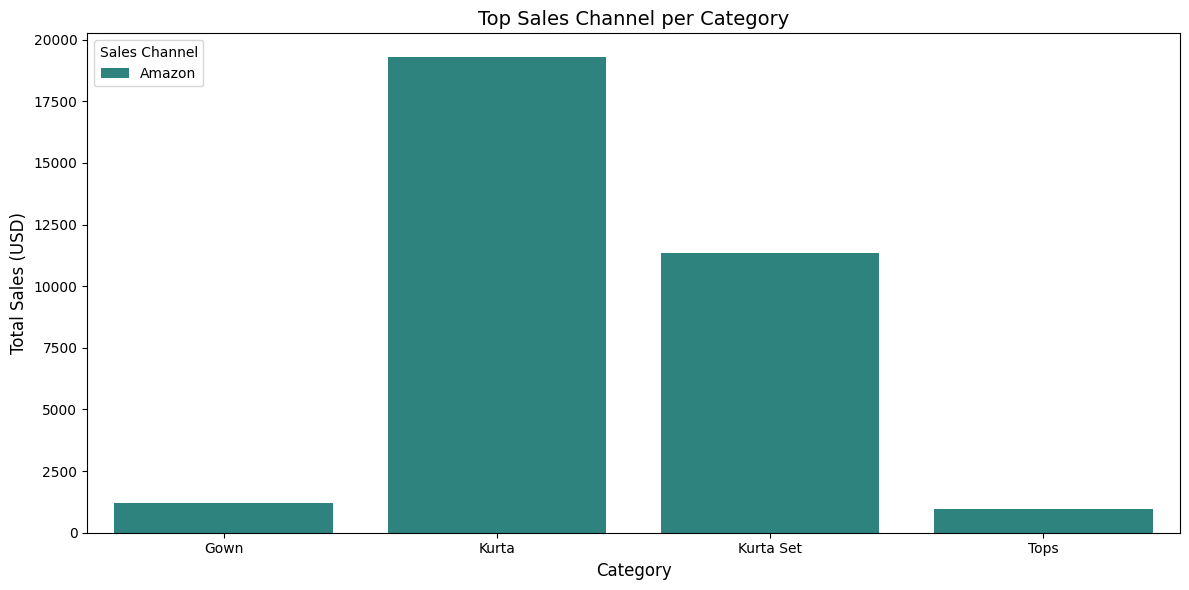

In [82]:
query = """
WITH Sales AS (
    SELECT 
        my.Category,
        'Amazon' AS Sales_Channel,
        SUM(my.Amazon_MRP * ce.Exchange_Rate_USD) AS Total_Sales
    FROM 
        'May-2022' my
    INNER JOIN 
        P__L_March_2021 pl
    ON 
        my.Sku = pl.Sku
    LEFT JOIN
        Currency_Exchange ce
    ON
        1 = 1
    WHERE ce.Currency = 'INR'
    GROUP BY 
        my.Category
    UNION ALL
    SELECT 
        my.Category,
        'Amazon FBA' AS Sales_Channel,
        SUM(my.Amazon_FBA_MRP * ce.Exchange_Rate_USD) AS Total_Sales
    FROM 
        'May-2022' my
    INNER JOIN 
        P__L_March_2021 pl
    ON 
        my.Sku = pl.Sku
    LEFT JOIN
        Currency_Exchange ce
    ON
        1 = 1
    WHERE ce.Currency = 'INR'
    GROUP BY 
        my.Category
    UNION ALL
    SELECT 
        my.Category,
        'Flipkart' AS Sales_Channel,
        SUM(my.Flipkart_MRP * ce.Exchange_Rate_USD) AS Total_Sales
    FROM 
        'May-2022' my
    INNER JOIN 
        P__L_March_2021 pl
    ON 
        my.Sku = pl.Sku
    LEFT JOIN
        Currency_Exchange ce
    ON
        1 = 1
    WHERE ce.Currency = 'INR'
    GROUP BY 
        my.Category
    UNION ALL
    SELECT 
        my.Category,
        'Myntra' AS Sales_Channel,
        SUM(my.Myntra_MRP * ce.Exchange_Rate_USD) AS Total_Sales
    FROM 
        'May-2022' my
    INNER JOIN 
        P__L_March_2021 pl
    ON 
        my.Sku = pl.Sku
    LEFT JOIN
        Currency_Exchange ce
    ON
        1 = 1
    WHERE ce.Currency = 'INR'
    GROUP BY 
        my.Category
)
, RankedSales AS (
    SELECT 
        s.Category,
        s.Sales_Channel,
        s.Total_Sales,
        ROW_NUMBER() OVER (PARTITION BY s.Category ORDER BY s.Total_Sales DESC) AS Rank
    FROM 
        Sales s
)
SELECT 
    rs.Category,
    rs.Sales_Channel,
    rs.Total_Sales
FROM 
    RankedSales rs
WHERE 
    rs.Rank = 1;
"""
# Execute the query
result = run_query(query)
print(result)

plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Total_Sales', hue='Sales_Channel', data=result, palette="viridis")

# Aggiungi titolo e etichette
plt.title("Top Sales Channel per Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)

# Mostra la legenda
plt.legend(title="Sales Channel", loc='upper left')

# Visualizza il grafico
plt.tight_layout()
plt.show()

PART 3: Data Transformation and Analytics 

- Sales channel with most income for each category.

This query is the same as the previous one, i.e. it always analyses the sales channels for each category. 
Except that in this case I tried to perform an analysis for the sales channel column provided in the Amazon Sale Report file. 

        category sales_channel  total_income
0         Blouse     Amazon.in      5217.012
1         Bottom     Amazon.in      1682.712
2        Dupatta     Amazon.in        10.980
3   Ethnic Dress     Amazon.in      9128.532
4          Saree     Amazon.in      1422.108
5            Set     Amazon.in    451841.712
6            Top     Amazon.in     62433.036
7  Western Dress     Amazon.in    127540.332
8          kurta     Amazon.in    245343.276


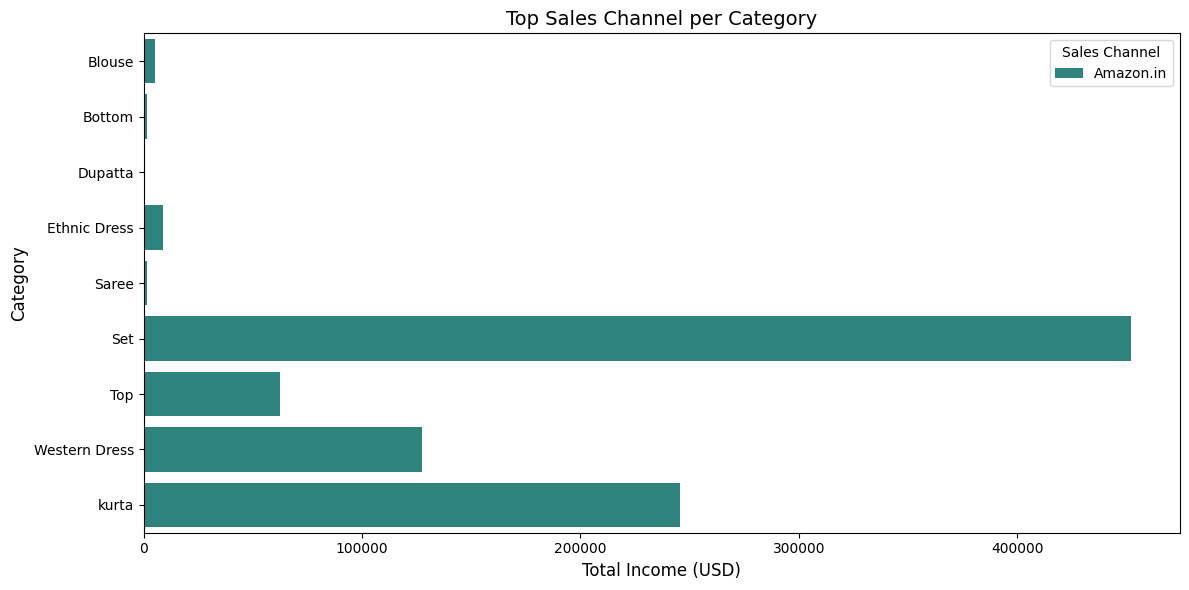

In [83]:
query = """
WITH RankedSales AS (
    SELECT 
        category,
        sales_channel,
        SUM(amount * ce.Exchange_Rate_USD) AS total_income,
        ROW_NUMBER() OVER (PARTITION BY category ORDER BY SUM(amount) DESC) AS rank
    FROM 
        Amazon_Sale_Report
    LEFT JOIN
        Currency_Exchange ce
    ON
        1 = 1
    WHERE ce.Currency = 'INR'
    GROUP BY 
        category, sales_channel
)
SELECT 
    category,
    sales_channel,
    total_income
FROM 
    RankedSales
WHERE 
    rank = 1;

"""
# Execute the query
result = run_query(query)
print(result)

# Creazione del grafico per visualizzare il canale di vendita con il reddito maggiore per categoria
plt.figure(figsize=(12, 6))

# Grafico a barre orizzontali, per vedere facilmente il reddito per categoria e canale di vendita
sns.barplot(x="total_income", y="category", hue="sales_channel", data=result, palette="viridis")

# Aggiungi titolo e etichette
plt.title("Top Sales Channel per Category", fontsize=14)
plt.xlabel("Total Income (USD)", fontsize=12)
plt.ylabel("Category", fontsize=12)

# Mostra la legenda
plt.legend(title="Sales Channel", loc='upper right')

# Visualizza il grafico
plt.tight_layout()
plt.show()

PART 3: Data Transformation and Analytics 

- Top 5 cities, based on the amount of delivery regardless of product type.

    Location  TotalDeliveryAmount Location_Type
0  BENGALURU            80047.104          city
1  HYDERABAD            57068.904          city
2     MUMBAI            42938.532          city
3  NEW DELHI            41819.748          city
4    CHENNAI            35634.564          city


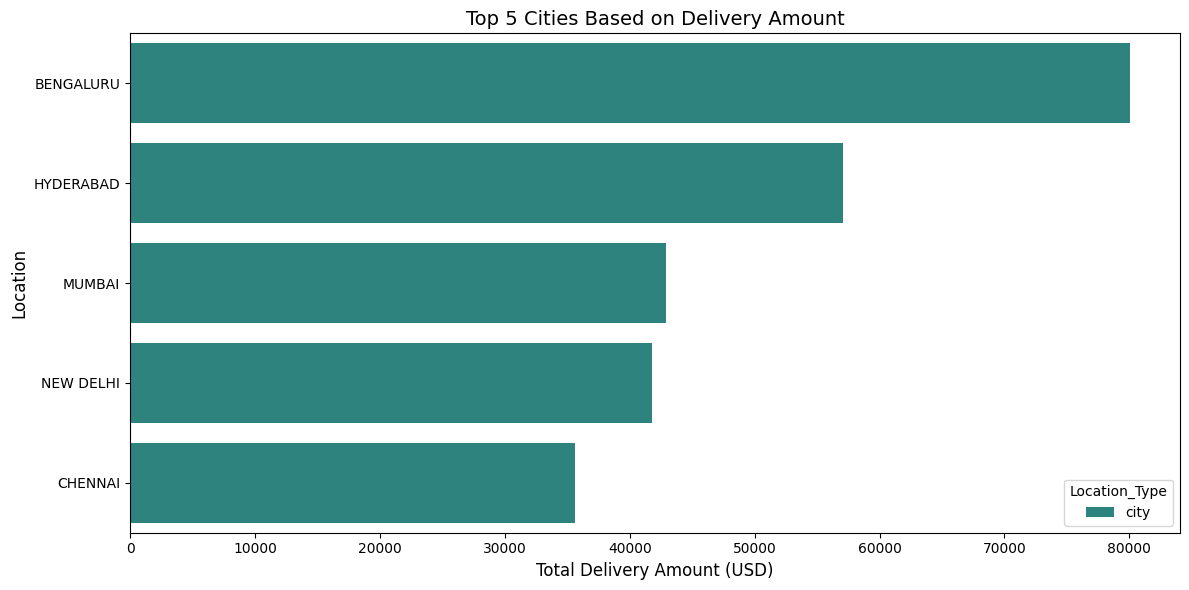

In [84]:
query = """
WITH RankedCities AS (
    SELECT 
        am."Ship-city" AS Location, 
        SUM(am.Amount * ce.Exchange_Rate_USD) AS TotalDeliveryAmount,
        RANK() OVER (ORDER BY SUM(am.Amount) DESC) AS rank_desc,
        'city' as Location_Type
    FROM Amazon_Sale_Report am
    LEFT JOIN Currency_Exchange ce
    ON 1 = 1
    WHERE ce.Currency = 'INR'
    GROUP BY am."Ship-city"
)
SELECT Location, TotalDeliveryAmount, Location_Type
FROM RankedCities
WHERE totaldeliveryamount > 0
LIMIT 5;
"""
# Execute the query
result = run_query(query)
print(result)

plt.figure(figsize=(12, 6))

# Display data for ‘city’ 
sns.barplot(x="TotalDeliveryAmount", y="Location", hue="Location_Type", data=result, palette="viridis")

# Add title and labels
plt.title("Top 5 Cities Based on Delivery Amount", fontsize=14)
plt.xlabel("Total Delivery Amount (USD)", fontsize=12)
plt.ylabel("Location", fontsize=12)

# Show graph
plt.tight_layout()
plt.show()

- Bottom 5 cities, based on the amount of delivery regardless of product type.

        Location  TotalDeliveryAmount Location_Type
0     KILAPAVOOR                2.892          city
1     NADUVANNUR                2.976          city
2  Andul, Howrah                3.108          city
3   Byatryanpura                3.108          city
4          Lanka                3.108          city


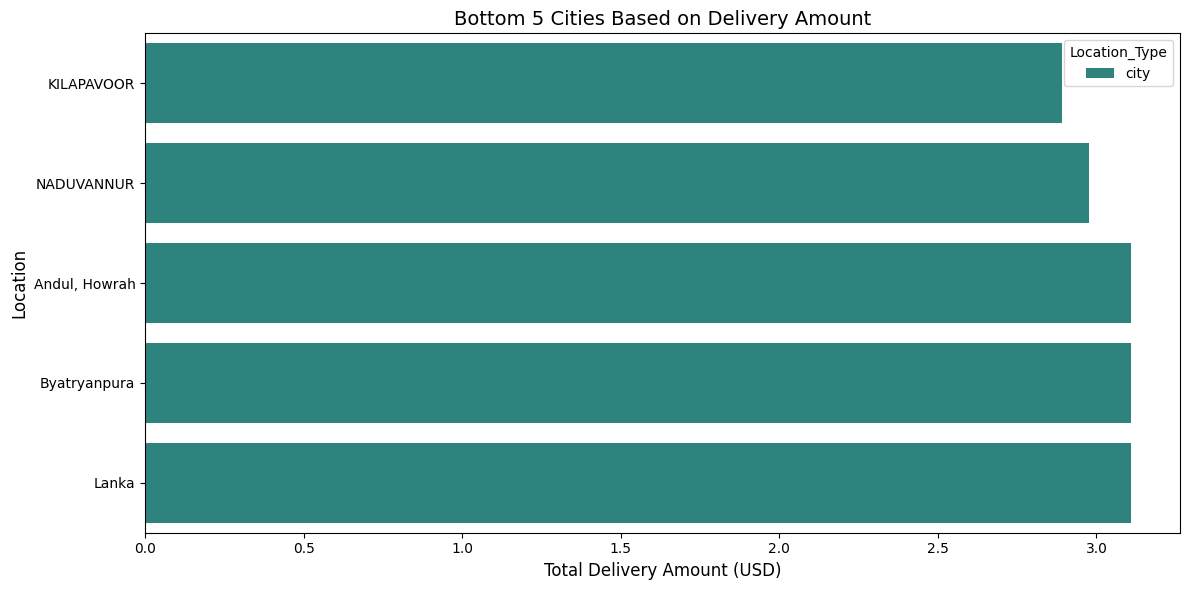

In [85]:
query = """
WITH RankedCities AS (
    SELECT 
        am."Ship-city" AS Location, 
        SUM(am.Amount * ce.Exchange_Rate_USD) AS TotalDeliveryAmount,        
        RANK() OVER (ORDER BY SUM(am.Amount) ASC) AS rank_asc,
        'city' as Location_Type
    FROM Amazon_Sale_Report am
    LEFT JOIN Currency_Exchange ce
    ON 1 = 1
    WHERE ce.Currency = 'INR'
    GROUP BY am."Ship-city"
)
SELECT Location, TotalDeliveryAmount, Location_Type
FROM RankedCities
WHERE totaldeliveryamount > 0
LIMIT 5;
"""
# Execute the query
result = run_query(query)
print(result)

plt.figure(figsize=(12, 6))

# Display data for ‘city’ 
sns.barplot(x="TotalDeliveryAmount", y="Location", hue="Location_Type", data=result, palette="viridis")

# Add title and labels
plt.title("Bottom 5 Cities Based on Delivery Amount", fontsize=14)
plt.xlabel("Total Delivery Amount (USD)", fontsize=12)
plt.ylabel("Location", fontsize=12)

# Show graph
plt.tight_layout()
plt.show()

PART 3: Data Transformation and Analytics 

- Top 5 regions, based on the amount of delivery regardless of product type.

        Location  TotalDeliveryAmount Location_Type
0    MAHARASHTRA           154374.132        region
1      KARNATAKA           121837.200        region
2      TELANGANA            79715.460        region
3  UTTAR PRADESH            77932.716        region
4     TAMIL NADU            74902.956        region


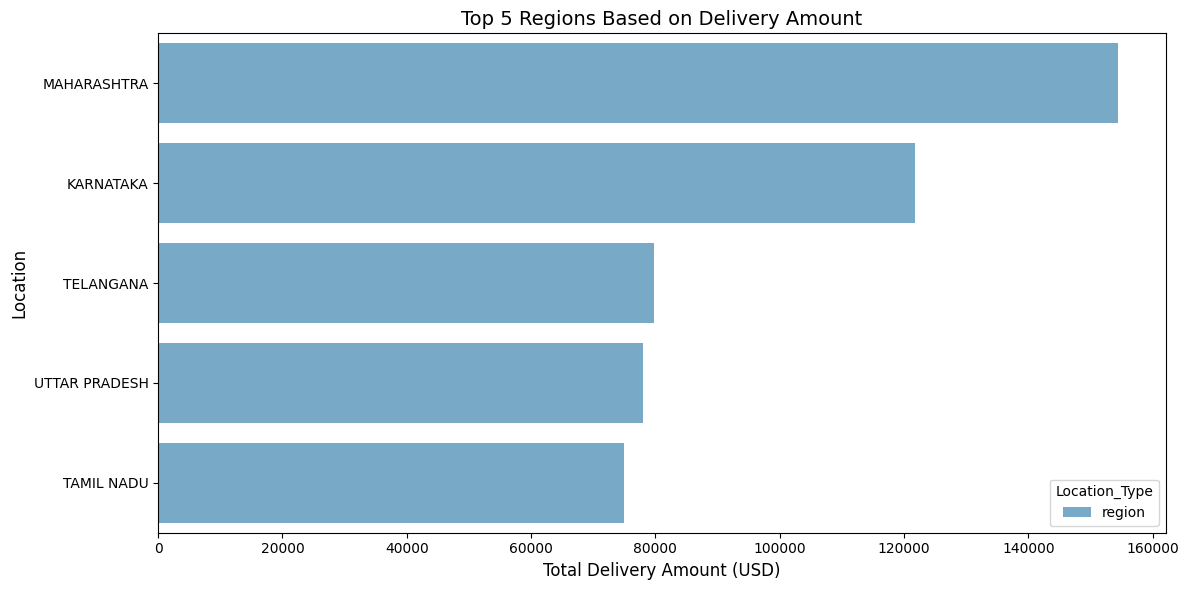

In [86]:
query = """
WITH RankedRegions AS (
    SELECT 
        am."Ship-state" AS Location, 
        SUM(am.Amount * ce.Exchange_Rate_USD) AS TotalDeliveryAmount,
        RANK() OVER (ORDER BY SUM(am.Amount) DESC) AS rank_desc,
        'region' as Location_Type
    FROM Amazon_Sale_Report am
    LEFT JOIN Currency_Exchange ce
    ON 1 = 1
    WHERE ce.Currency = 'INR'
    GROUP BY am."Ship-state"
)
SELECT Location, TotalDeliveryAmount, Location_Type
FROM RankedRegions
WHERE totaldeliveryamount > 0
LIMIT 5;
"""
# Execute the query
result = run_query(query)
print(result)

plt.figure(figsize=(12, 6))

# Display data for ‘city’ 
sns.barplot(x="TotalDeliveryAmount", y="Location", hue="Location_Type", data=result, palette="Blues")

# Add title and labels
plt.title("Top 5 Regions Based on Delivery Amount", fontsize=14)
plt.xlabel("Total Delivery Amount (USD)", fontsize=12)
plt.ylabel("Location", fontsize=12)

# Show graph
plt.tight_layout()
plt.show()

- Bottom 5 regions, based on the amount of delivery regardless of product type.

      Location  TotalDeliveryAmount Location_Type
0           PB                4.788        region
1     Rajsthan                5.316        region
2           AR                5.916        region
3     rajsthan                6.252        region
4  Pondicherry                6.348        region


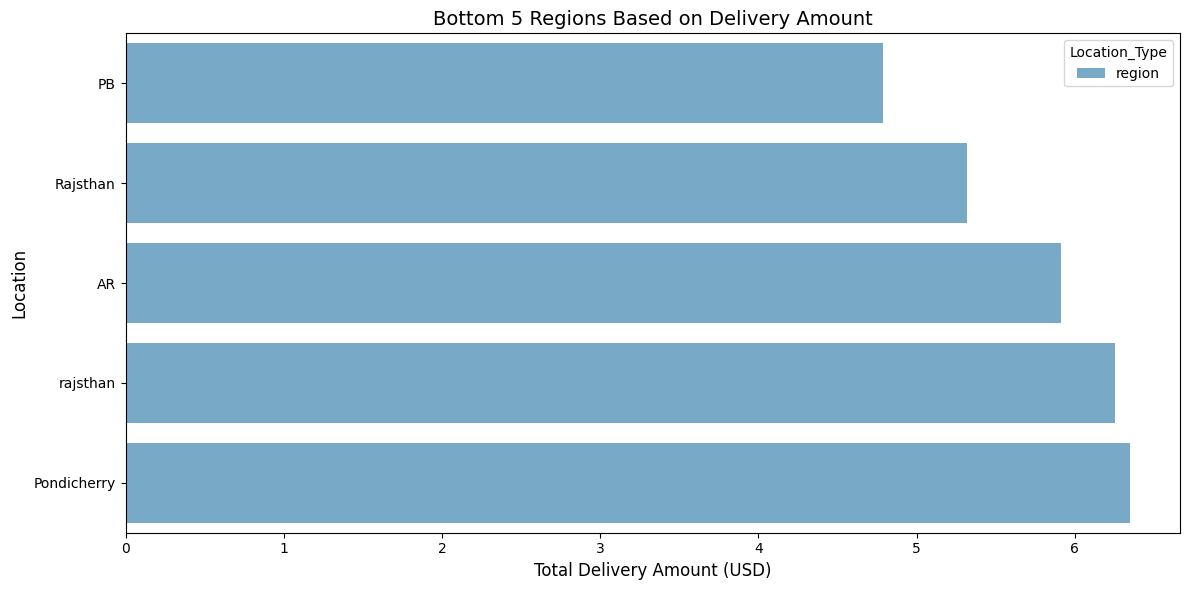

In [87]:
query = """
WITH RankedRegions AS (
    SELECT 
        am."Ship-state" AS Location, 
        SUM(am.Amount * ce.Exchange_Rate_USD) AS TotalDeliveryAmount,        
        RANK() OVER (ORDER BY SUM(am.Amount) ASC) AS rank_asc,
        'region' as Location_Type
    FROM Amazon_Sale_Report am
    LEFT JOIN Currency_Exchange ce
    ON 1 = 1
    WHERE ce.Currency = 'INR'
    GROUP BY am."Ship-state"
)
SELECT Location, TotalDeliveryAmount, Location_Type
FROM RankedRegions
WHERE totaldeliveryamount > 0
LIMIT 5;
"""
# Execute the query
result = run_query(query)
print(result)

plt.figure(figsize=(12, 6))

# Display data for ‘city’ 
sns.barplot(x="TotalDeliveryAmount", y="Location", hue="Location_Type", data=result, palette="Blues")

# Add title and labels
plt.title("Bottom 5 Regions Based on Delivery Amount", fontsize=14)
plt.xlabel("Total Delivery Amount (USD)", fontsize=12)
plt.ylabel("Location", fontsize=12)

# Show graph
plt.tight_layout()
plt.show()

END PART 3: Data Transformation and Analytics 